In [1]:
# 导入
import tensorflow as tf
from tensorflow.keras import layers

print(tf.__version__)
print(tf.keras.__version__)

2.0.0-alpha0
2.2.4-tf


In [41]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape([x_train.shape[0], -1])
x_test = x_test.reshape([x_test.shape[0], -1])
print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)
print(x_train.dtype)

(60000, 784)   (60000,)
(10000, 784)   (10000,)
uint8


In [72]:
# 创建一个简单的神经网络
model = tf.keras.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(784,)))
model.add(layers.Dense(32,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal))
model.add(layers.Dense(32,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(layers.Dense(10,activation='softmax'))

In [73]:
# 
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', kernel_initializer='he_normal', input_shape=(784,)),
    layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(64, activation='relu', kernel_initializer='he_normal',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dense(10, activation='softmax')
])

In [74]:
# 如果你的 targets 是 one-hot 编码，用 categorical_crossentropy
# 如果你的 tagets 是 数字编码 ，用 sparse_categorical_crossentropy
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_81 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_82 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_83 (Dense)             (None, 10)                650       
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________________________


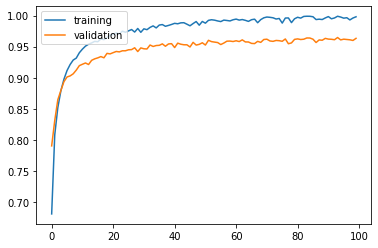

In [75]:
history = model.fit(x_train, y_train, batch_size=256, epochs=100, validation_split=0.3, verbose=0)
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [47]:
history.__dict__

{'validation_data': None,
 'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x1358dc6d8>,
 '_chief_worker_only': None,
 'params': {'batch_size': 256,
  'epochs': 100,
  'steps': None,
  'samples': 42000,
  'verbose': 0,
  'do_validation': True,
  'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']},
 'epoch': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99],
 'history': {'loss': [8.437718522298903,
   2.357544640677316,
   1.700278

In [59]:
results = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 26us/sample - loss: 0.2146 - accuracy: 0.9694


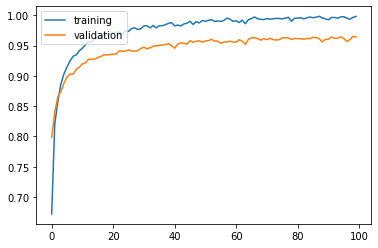

In [63]:
input_x = tf.keras.Input(shape=(784,))
hidden1 = layers.Dense(64, activation='relu', kernel_initializer='he_normal')(input_x)
hidden2 = layers.Dense(64, activation='relu', kernel_initializer='he_normal')(hidden1)
hidden3 = layers.Dense(64, activation='relu', kernel_initializer='he_normal',kernel_regularizer=tf.keras.regularizers.l2(0.01))(hidden2)
output = layers.Dense(10, activation='softmax')(hidden3)

model2 = tf.keras.Model(inputs = input_x,outputs = output)
model2.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              #loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model2.fit(x_train, y_train, batch_size=256, epochs=100, validation_split=0.3, verbose=0)
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [64]:
# 模型保存
model.save('model.h5')
model1 = tf.keras.models.load_model('model.h5')
results = model1.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.2146 - accuracy: 0.9694


In [65]:
model2.save('model2.h5')
model3 = tf.keras.models.load_model('model2.h5')
results = model1.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 22us/sample - loss: 0.2146 - accuracy: 0.9694


In [68]:
#  模型中加入batchNormalization 和 dropout
model4 = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(784,)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])
model4.compile(optimizer=tf.keras.optimizers.Adam(0.001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model4.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 64)                50240     
_________________________________________________________________
batch_normalization_v2_3 (Ba (None, 64)                256       
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_73 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_v2_4 (Ba (None, 64)                256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_74 (Dense)             (None, 64)               

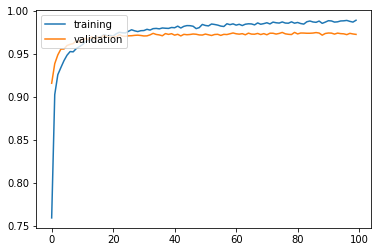

In [69]:
model4.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              #loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model4.fit(x_train, y_train, batch_size=256, epochs=100, validation_split=0.3, verbose=0)
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='upper left')
plt.show()